# Geo-spatial Microcourse

Must install GDAL, GEOS, Spatial Index, Pillow, PySal, GeoPandas, and RTree.

To install the following non-python packages (GDAL, GEOS, Spatial Index), you must install homebrew at this link: https://brew.sh/

Then run the following commands in your terminal:
* _brew install gdal_
* _brew install geos_
* _brew install spatialindex_

To install the python packages (Pillow, PySal, GeoPandas, RTree) run the following commands:
* _pip3 install pillow_
* _pip3 install pysal_
* _pip3 install geopandas_
* _pip3 install rtree_
* _pip3 install contextily_

Geospatial Analysis is the collection, display, and manipulation, of geographic/spatial data. Geospatial Analytics can help predict changes due to changing spatial conditions and can find patterns between certain geographic variables. Geospatial analysis is extremely useful due to how easy it makes identifying geographic patterns that help us develop a better understanding of how various systems interact with one another.

In this microcourse, we will cover the following topics:

* What is geospatial analysis
* Why geospatial analysis is useful
* How to use python and its libraries for geospatial analysis
* How to combine python libraries' functions with other geospatial packages 

In [3]:
#Import Statements:

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon #Used for custom points and polygons
%matplotlib inline
import matplotlib.pyplot as plt
import contextily as ctx

In [4]:
from geopy.geocoders import Nominatim #used for georeferencing
from geopy.geocoders import GoogleV3

In [5]:
#Shows readily available geospatial datasets
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Shape files are used for geospatial analysis. They usually come as a zip file when you download them. Shapefiles are inside the unzipped folder, and the folder contains several other necessary files as well.

* Shape file (shp): Actual geometry of your shapes
* Database (dbf): Information associated with every shape in your shape file
* Projection (prj): Files about the assumptions of the earth and the area we are mapping
* Index (shx): Makes your shape file slightly faster


Download the shapefile used in this microcourse at this link: https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e_0/explore?location=38.612063%2C-122.593435%2C4.09

In [6]:
#Opening shape files
states = gpd.read_file("States_shapefile")
states.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


<AxesSubplot:>

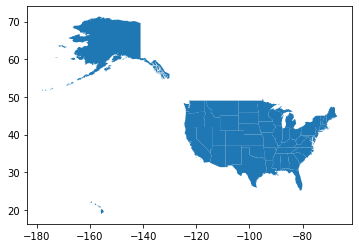

In [7]:
#mapping the polygons
states.plot()

In [8]:
#similar to pandas where it shows you all the columns in a geo dataframe
states.columns

Index(['FID', 'Program', 'State_Code', 'State_Name', 'Flowing_St', 'FID_1',
       'geometry'],
      dtype='object')

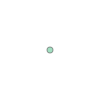

In [9]:
#a Shapely point can be plotted
Point(-78,41)

#### Exercise:

Plot two points with the coordinates (50,-80) and (36,70)

Hint: Use matplotlib's scatter function to plot two points by accessing their x and y coordinates.

In [10]:
#Write your code here:



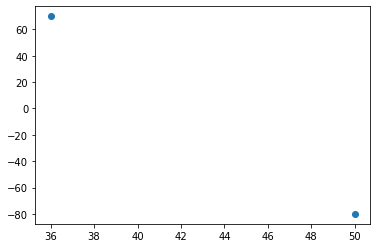

In [11]:
#Solution (Any method to access the x and y coordinates is acceptable)

points = [Point(50, -80), 
          Point(36, 70)]
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys)

In [12]:
#Read in the csv file as a pandas dataframe
df = pd.read_csv("generation_data_USA.csv")

#Created Shapely points using the longitude and latitude values
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis = 1)

#Created geo dataframe using the previous dataframe and the points
powerplants = gpd.GeoDataFrame(df, geometry = points)

#Specified that the points are for longitude and latitude
powerplants.crs = {'init': 'epsg:4326'}
powerplants.head()

/Users/srideepdornala/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/srideepdornala/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Plant Code,Country,Plant Name,Owner,Latitude,Longitude,Primary Fuel,Total Capacity(MW),Net Generation (MWh),Operating Year,geometry
0,2,USA,Bankhead Dam,Alabama Power Co,33.458665,-87.356823,Hydro,53.9,47391,1963,POINT (-87.35682 33.45867)
1,3,USA,Barry,Alabama Power Co,31.006900,-88.010300,Coal,2841.5,12981029,1954,POINT (-88.01030 31.00690)
2,4,USA,Walter Bouldin Dam,Alabama Power Co,32.583889,-86.283056,Hydro,225.0,590121,1967,POINT (-86.28306 32.58389)
3,7,USA,Gadsden,Alabama Power Co,34.012800,-85.970800,Coal,138.0,216750,1949,POINT (-85.97080 34.01280)
4,8,USA,Gorgas,Alabama Power Co,33.644344,-87.196486,Coal,1416.7,5247433,1972,POINT (-87.19649 33.64434)


<AxesSubplot:>

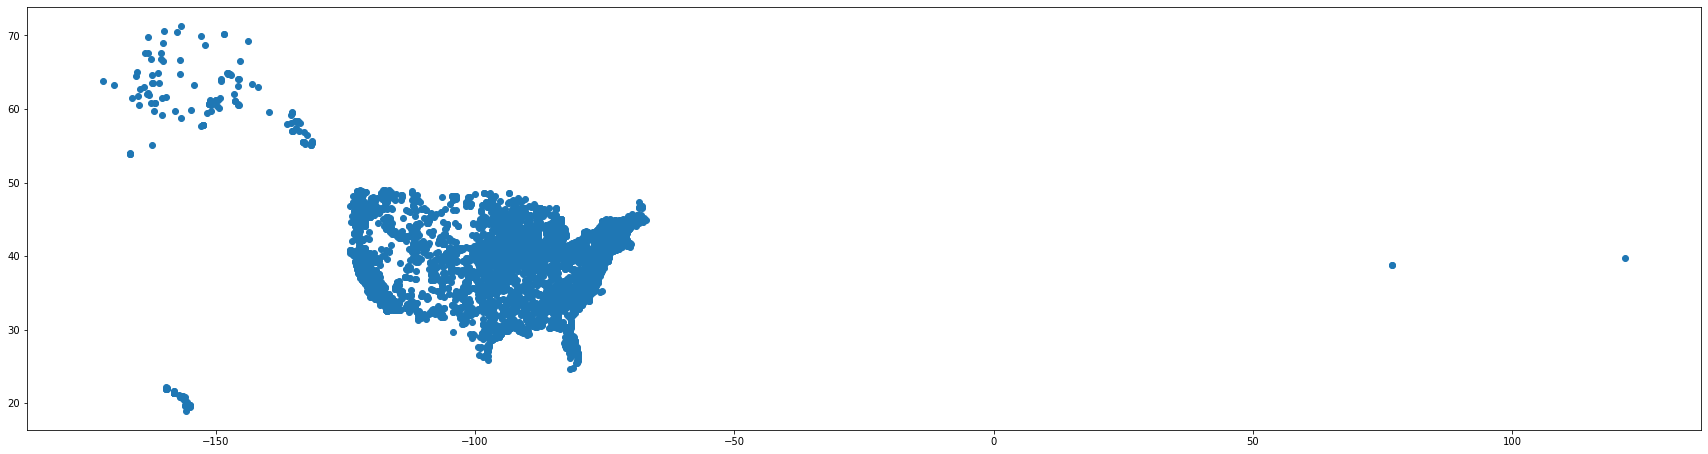

In [13]:
powerplants.plot(figsize=(30,30))

In [14]:
#Can work backwards and convert the Points to longitude and latitude values and then back to points:
x_s = [f.x for f in powerplants.geometry]
y_s = [f.y for f in powerplants.geometry]
powerplants['New Longitude'] = x_s
powerplants['New Latitude'] = y_s
powerplants['New Points'] = gpd.points_from_xy(x_s, y_s)

In [15]:
#Here, you generate the new longitude and latitude columns using the given point geometry
#Then you generate the same points in a backwards process
powerplants.head()

,Plant Code,Country,Plant Name,Owner,Latitude,Longitude,Primary Fuel,Total Capacity(MW),Net Generation (MWh),Operating Year,geometry,New Longitude,New Latitude,New Points
0,2,USA,Bankhead Dam,Alabama Power Co,33.458665,-87.356823,Hydro,53.9,47391,1963,POINT (-87.35682 33.45867),-87.356823,33.458665,POINT (-87.35682 33.45867)
1,3,USA,Barry,Alabama Power Co,31.006900,-88.010300,Coal,2841.5,12981029,1954,POINT (-88.01030 31.00690),-88.010300,31.006900,POINT (-88.01030 31.00690)
2,4,USA,Walter Bouldin Dam,Alabama Power Co,32.583889,-86.283056,Hydro,225.0,590121,1967,POINT (-86.28306 32.58389),-86.283056,32.583889,POINT (-86.28306 32.58389)
3,7,USA,Gadsden,Alabama Power Co,34.012800,-85.970800,Coal,138.0,216750,1949,POINT (-85.97080 34.01280),-85.970800,34.012800,POINT (-85.97080 34.01280)
4,8,USA,Gorgas,Alabama Power Co,33.644344,-87.196486,Coal,1416.7,5247433,1972,POINT (-87.19649 33.64434),-87.196486,33.644344,POINT (-87.19649 33.64434)


In [16]:
states.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [17]:
#Gives area of each polygon (state)
states.geometry.area

/var/folders/v8/m4ftc6411877skf37dpzpbs40000gn/T/ipykernel_4081/721080239.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states.geometry.area


0      12.897169
1     277.524097
2      28.859090
3      13.517465
4      41.533618
5      28.041597
6       1.392525
7       0.553341
8       0.017770
9      13.347672
10     14.598827
11      1.429289
12     24.391595
13     15.396865
14      9.932130
15     15.853379
16     21.982305
17     10.645396
18     11.224653
19      9.570698
20      2.625153
21      2.309209
22     16.928260
23     25.577836
24     11.871069
25     18.647904
26     45.134302
27     21.606940
28     29.969925
29      2.677296
30      2.056741
31     30.936647
32     13.874948
33     12.628136
34     21.874874
35     11.300201
36     18.031461
37     28.187789
38     12.550313
39      0.292629
40      7.794504
41     22.598105
42     10.876612
43     65.059642
44     22.967423
45      2.794117
46     10.512334
47     20.750758
48      6.493294
49     16.477327
50     27.966688
dtype: float64

In [18]:
states['area'] = states.geometry.area

/var/folders/v8/m4ftc6411877skf37dpzpbs40000gn/T/ipykernel_4081/4168852553.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states['area'] = states.geometry.area


### Exercise:

Find the largest state's area.

In [19]:
#Write your code here:



In [20]:
#Solution

max = states.geometry.area[0]
for x in states.geometry.area:
    if(x > max):
        max = x
print(max)

277.5240968886815


/var/folders/v8/m4ftc6411877skf37dpzpbs40000gn/T/ipykernel_4081/4153132677.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  max = states.geometry.area[0]
/var/folders/v8/m4ftc6411877skf37dpzpbs40000gn/T/ipykernel_4081/4153132677.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x in states.geometry.area:


### Coordinate Reference System

The above error shows that the results from the 'area' is probably not correct. Why is this?

It is because the map has not been mapped to a coordinate reference system (CRS).

A Coordinate Reference System, or a Geographic Coordinate System is used because the Earth isn't actually perfectly spherical or elliptical. A datum is where the ellipsoid goes. A coordinate reference system is which ellipsoid, datums, and the units of the system you use. Thw well known text states all the assumptions for different CRSs. The United States has the state plane system. The code used in the crs function to specify that the points are for a specific longitude and latitude is an example of this.

<AxesSubplot:>

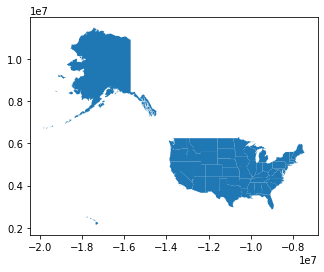

In [21]:
#can reproject to different visualizations
states.to_crs({'proj':'merc'}).plot()
#mapped in mercator projection

Best Projection for the contiguous united states: NAD83. As you can see below from running the code, Alaska isn't mapped very well. Can find information about various datums and projections here: https://epsg.io/5071-1901

<AxesSubplot:>

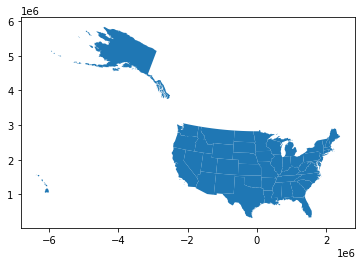

In [22]:
#Normally to use certain projections, you would need to type out all this code
states.to_crs({'datum':'NAD83','no_defs':True,'proj':'aea', 'lat_1':29.5,'lat_2':25.5,'lat_0':23,'lon_0':-96}).plot()

<AxesSubplot:>

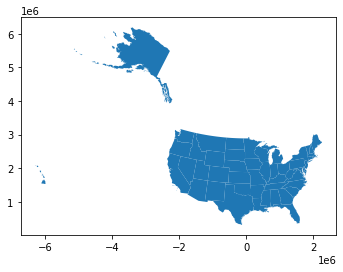

In [23]:
#However, using the epsg code, you could make your code shorter
states.to_crs(epsg=5071).plot()

(-183.7800147286842, -61.40685466968432, 16.29756389397861, 74.03045781836319)

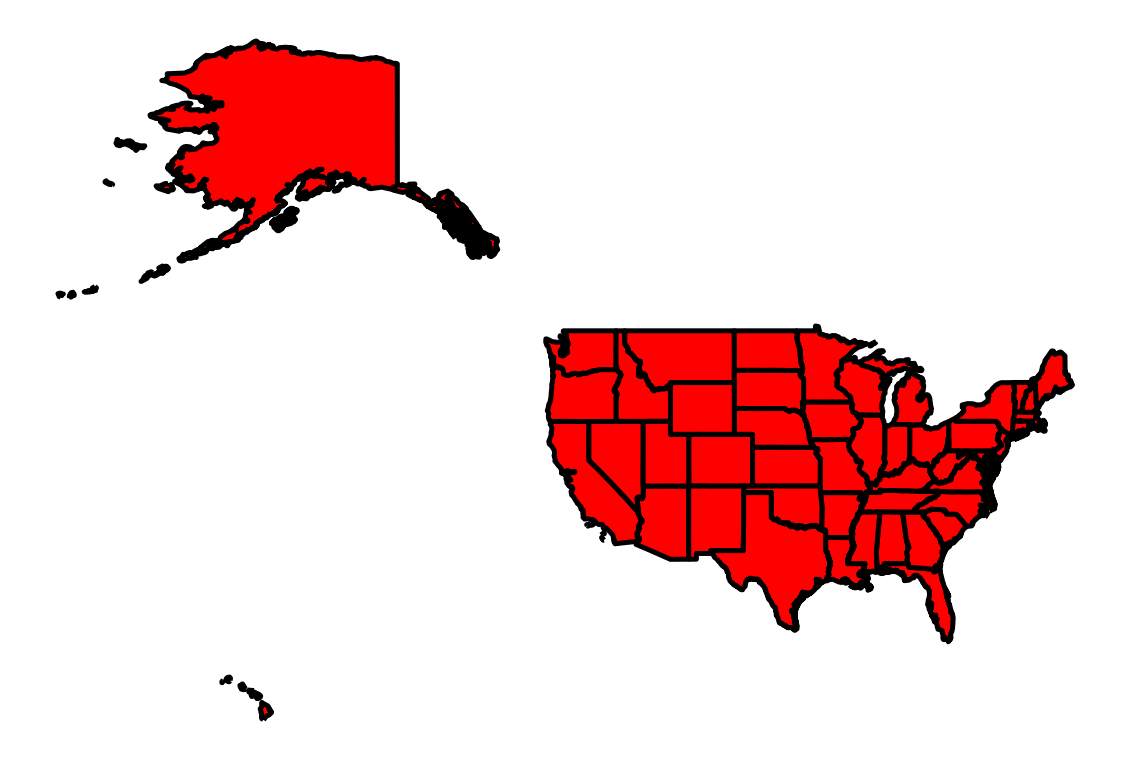

In [24]:
#Can make maps appear bigger or smaller using figsize (Maximum to as big as your screen in Jupyter Notebook)
#Can customize edge color and size and infill color as well (Can use hexadecimal color codes as well)
ax = states.plot(figsize=(20,20), color = 'red', edgecolor = 'black', linewidth = 5)
#Can turn the borders off
ax.axis('off')

### Choropleth Maps

A choropleth map is one where the colors of individual geometries change based on a different value. This can be done by simply using the plot function and setting a new parameter, column, as the column you wish to use to differentiate the states.

<AxesSubplot:>

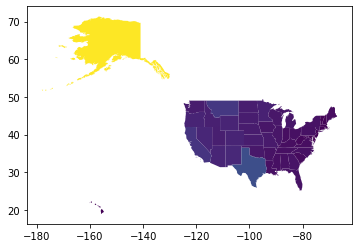

In [25]:
states.plot(column = 'area')

<AxesSubplot:>

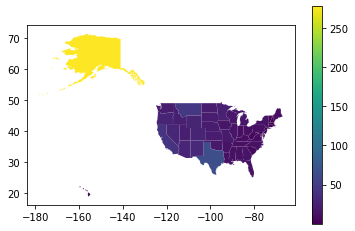

In [26]:
#Can also enable a legend
states.plot(column = 'area', legend = True)

Chloropleth maps are one of the main reasons GeoPandas is so powerful. It can automatically create a map that visualizes the differences between states in certain variables. You can differentiate geometries using population, area, or any other suitable quantitative value in your data.

### Exercise:

Plot the US map with a figure size of 20 by 20, with black edges, and with a line width of 2. Differentiate the colors of the states using the states area by making a chloropleth map. Remove Alaska from the map and enable the legend.

In [27]:
#Write your code here



/var/folders/v8/m4ftc6411877skf37dpzpbs40000gn/T/ipykernel_4081/3902811624.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states[states.area < 200].plot(figsize=(20,20), column='area', edgecolor = 'black', linewidth = 2, legend = True)


<AxesSubplot:>

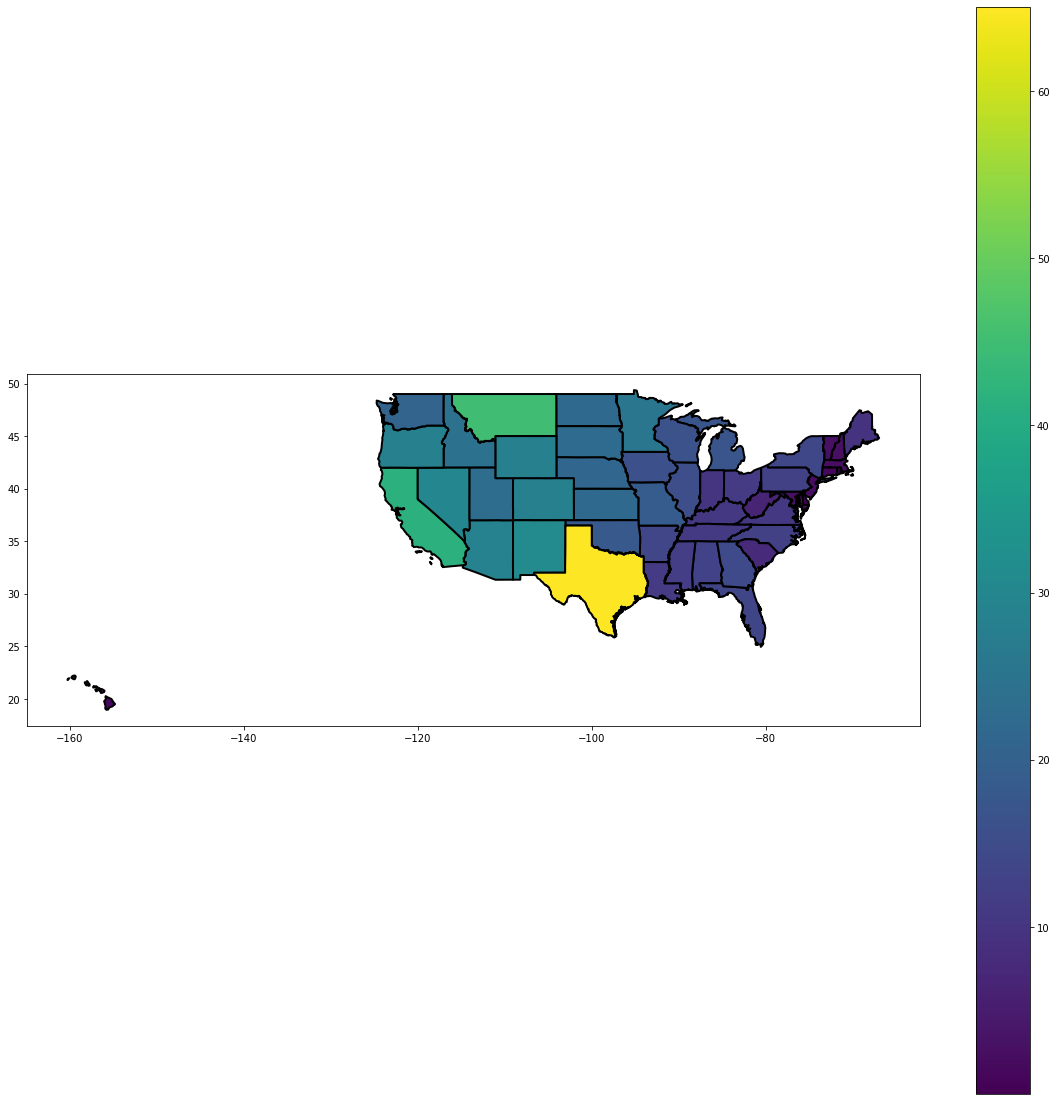

In [28]:
#Solution

states[states.area < 200].plot(figsize=(20,20), column='area', edgecolor = 'black', linewidth = 2, legend = True)

### Basemaps

The final thing we will cover in this beginner geo-spatial analysis course are basemaps, or basically pictures that you can add behind a generated geo-spatial plot.

We use the contextily library for this.

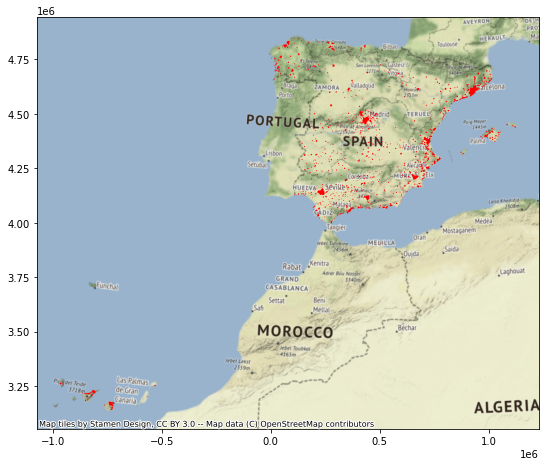

In [30]:
data_url = "https://ndownloader.figshare.com/files/20232174"
db = gpd.read_file(data_url)
polygons = db.plot(color="red", figsize=(9, 9))
ctx.add_basemap(ax, crs=db.crs.to_string())

So what exactly happened above? Let's take a closer look.

In [31]:
# This geopandas dataframe contains polygons for all the plots
db.head()

,city_id,n_buildings,geometry
0,ci000,2348,"POLYGON ((385390.071 4202949.446, 384488.697 4..."
1,ci001,2741,"POLYGON ((214893.033 4579137.558, 215258.185 4..."
2,ci002,5472,"POLYGON ((690674.281 4182188.538, 691047.526 4..."
3,ci003,14608,"POLYGON ((513378.282 4072327.639, 513408.853 4..."
4,ci004,2324,"POLYGON ((206989.081 4129478.031, 207275.702 4..."


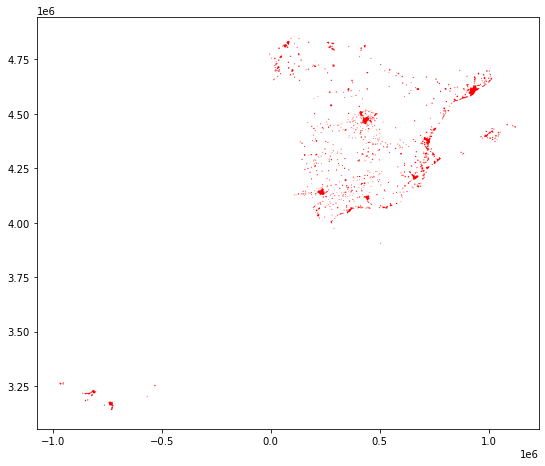

In [32]:
# Then, all the polygons are plotted
polygons = db.plot(color="red", figsize=(9, 9))

In [34]:
# Finally, the basemap is added
ctx.add_basemap(polygons, crs=db.crs.to_string())

# The parameters in the add_basemap function are: AxesSubplot, crs is coordinate reference system

# Source is another parameter that can be used, it changes the type of basemap 
# (set to Stamen Terrain Web Tiles at default)

<Figure size 432x288 with 0 Axes>

Check out further basemap documentation at: https://contextily.readthedocs.io/en/latest/reference.html#plotting-basemaps